In [23]:
import cv2
import os
import numpy as np
import pandas as pd
from preprocessing import grid_3d
import matplotlib.pyplot as plt

from model import confusion_matrix
import seaborn as sns

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# LDA Start

# Data preprocessing

In [25]:
label_encode_dict = {}
label_decode_dict = {}

for i in range(1, 41):
    label_encode_dict[i] = f"S{i}"
    
for i in range(1, 41):
    label_decode_dict[f"s{i}"] = i

In [26]:
import os
def load_images_from_folder(folder, label , width, height):
    images = []
    labels = []
    for filename in os.listdir(folder):

        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (width, height))

            if img is not None:
                images.append(img.reshape(1,-1))
                labels.append(label_decode_dict[label])
    return images, labels


In [27]:
train_folder = './data/faces/'
# test_folder = './data/faces/testing'


# Training 데이터 불러오기
train_images = []
train_label = []

print()
for folder in sorted(os.listdir(train_folder)):
    path = os.path.join(train_folder, folder)
    if os.path.isdir(path):
        images, labels = load_images_from_folder(path, folder, 64, 64)
        train_images.append(np.concatenate(images))
        train_label.append(labels)


# 넘파이 배열로 변환
train_data = np.concatenate(train_images)
train_label = np.array(train_label).reshape(-1)
#

print("Training 데이터 shape:", train_data.shape)
print("Training 정답 shape:", train_label.shape)

# print("Testing 데이터 shape:", test_data.shape)


Training 데이터 shape: (400, 4096)
Training 정답 shape: (400,)


# 데이터 설정

In [28]:
np.random.seed(7)
random_selection = sorted(np.random.choice(np.unique(train_label), 3, replace=False))
print("랜덤하게 선택된 라벨:", random_selection)

랜덤하게 선택된 라벨: [18, 35, 38]


In [30]:
query_data = train_data[np.isin(train_label, random_selection)]
query_label = train_label[np.isin(train_label, random_selection)]
gallery_data = train_data[~np.isin(train_label, random_selection)]
gallery_label = train_label[~np.isin(train_label, random_selection)]

print("X_train shape :", gallery_data.shape)
print("y_train shape :", gallery_label.shape)

print("X_test shape :", query_data.shape)
print("y_test shape :", query_label.shape)

X_train shape : (370, 4096)
y_train shape : (370,)
X_test shape : (30, 4096)
y_test shape : (30,)


# LDA 시작

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd")

lda.fit(gallery_data, gallery_label)

LinearDiscriminantAnalysis()

In [57]:
from preprocessing import LDA

In [58]:
custom_lda = LDA(gallery_data, gallery_label)
custom_lda.fit_svd(36)
fisherface =custom_lda.vector.T[:15].reshape(15, 64, 64)

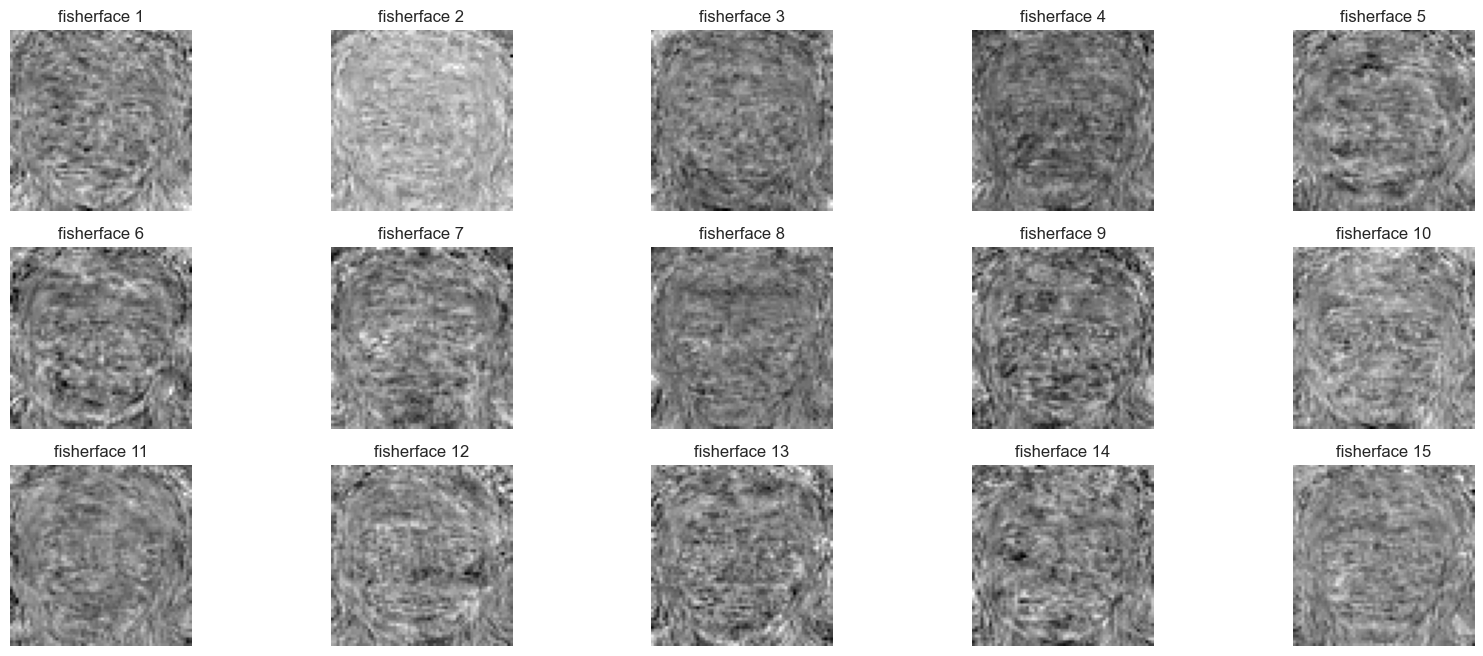

In [59]:
def face_show(fisherface):
    plt.figure(figsize=(20, 8))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(fisherface[i], cmap='gray')
        plt.title("fisherface {}".format(i + 1))
        plt.savefig("./fig/fisherface.png")
        plt.axis('off')
    plt.show()

face_show(fisherface)

In [60]:
from preprocessing import get_angle_in_degrees

s = custom_lda.vector.T
c = lda.scalings_.T

n = 0
angle_list = []
for v1, v2 in zip(s, c):
    a = get_angle_in_degrees(v1, v2)
    print(f"Custom PCA, sklearn 이루는 각도 : ", a)

Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sk

In [61]:
result =custom_lda(query_data)
query_result = result[:, :3]

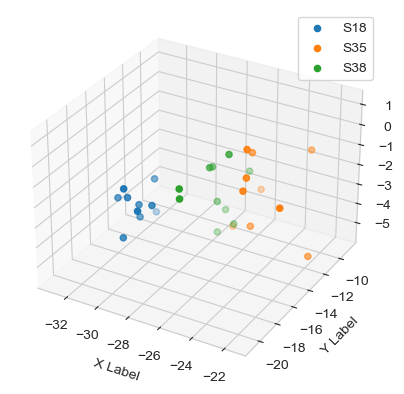

In [62]:
grid_3d(query_result, query_label, "LDA", label_encode_dict)

# PCA 샐행

# Eigenface

In [63]:
import matplotlib.pyplot as plt
def face_show(eigenfaces, name):
    plt.figure(figsize=(20, 8))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(eigenfaces[i], cmap='gray')
        plt.title("Eigenface {}".format(i + 1))
        plt.axis('off')
    plt.savefig(f"./fig/{name} eigenface.png")
    plt.show()


In [64]:
from preprocessing import PCA

In [65]:
train_pca = PCA(gallery_data)

In [66]:
train_pca.fit(15)

(4096, 4096)


In [68]:
eigenfaces = train_pca.v.T.reshape(15, 64,64)

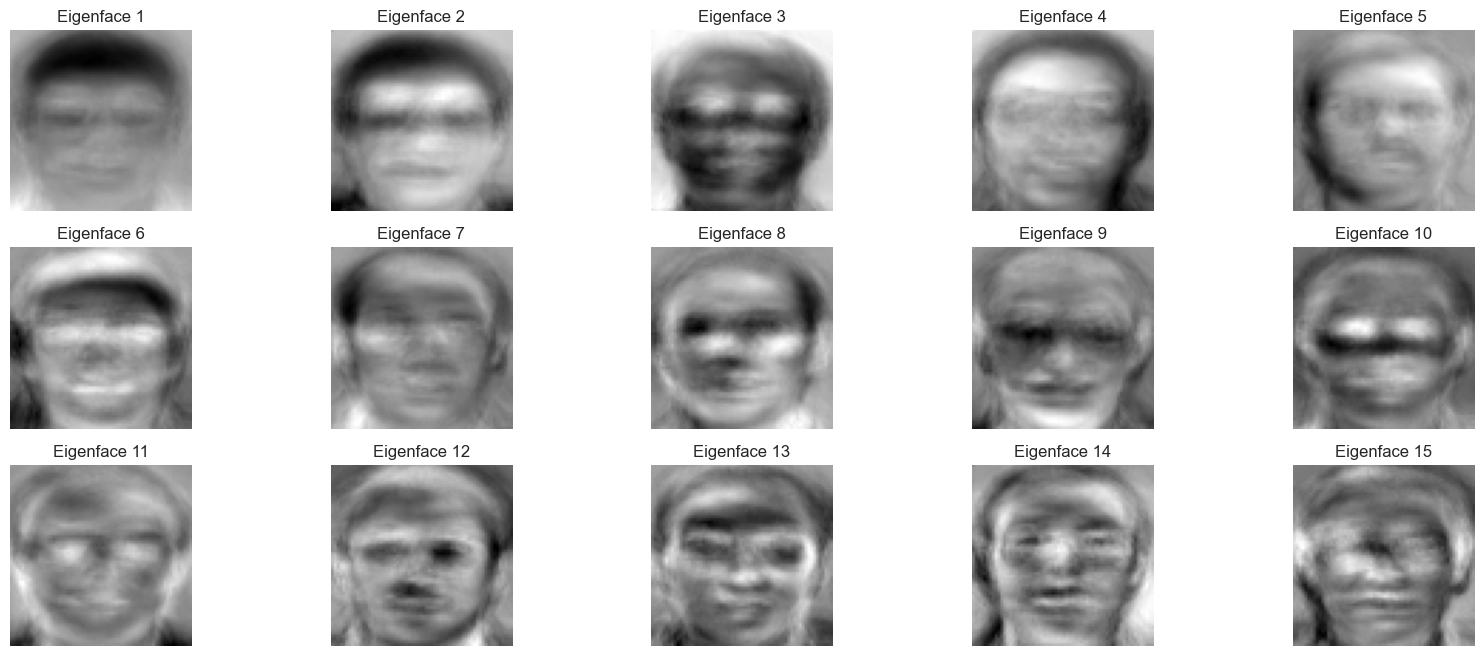

In [69]:
face_show(eigenfaces, "custom")

# Sklearn PCA 비교

In [70]:
from sklearn.decomposition import PCA as pca_sk
pcaa = pca_sk(n_components=15)

In [71]:
pcaa.fit(gallery_data)

PCA(n_components=15)

In [72]:
from preprocessing import get_angle_in_degrees

s = train_pca.v.T
n = 0
angle_list = []
for v1, v2 in zip(pcaa.components_, s):
    a = get_angle_in_degrees(v1, v2)
    print(f"Custom PCA, sklearn 이루는 각도 : ", a)

Custom PCA, sklearn 이루는 각도 :  180.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  180.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  180.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  180.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  0.0
Custom PCA, sklearn 이루는 각도 :  180.0


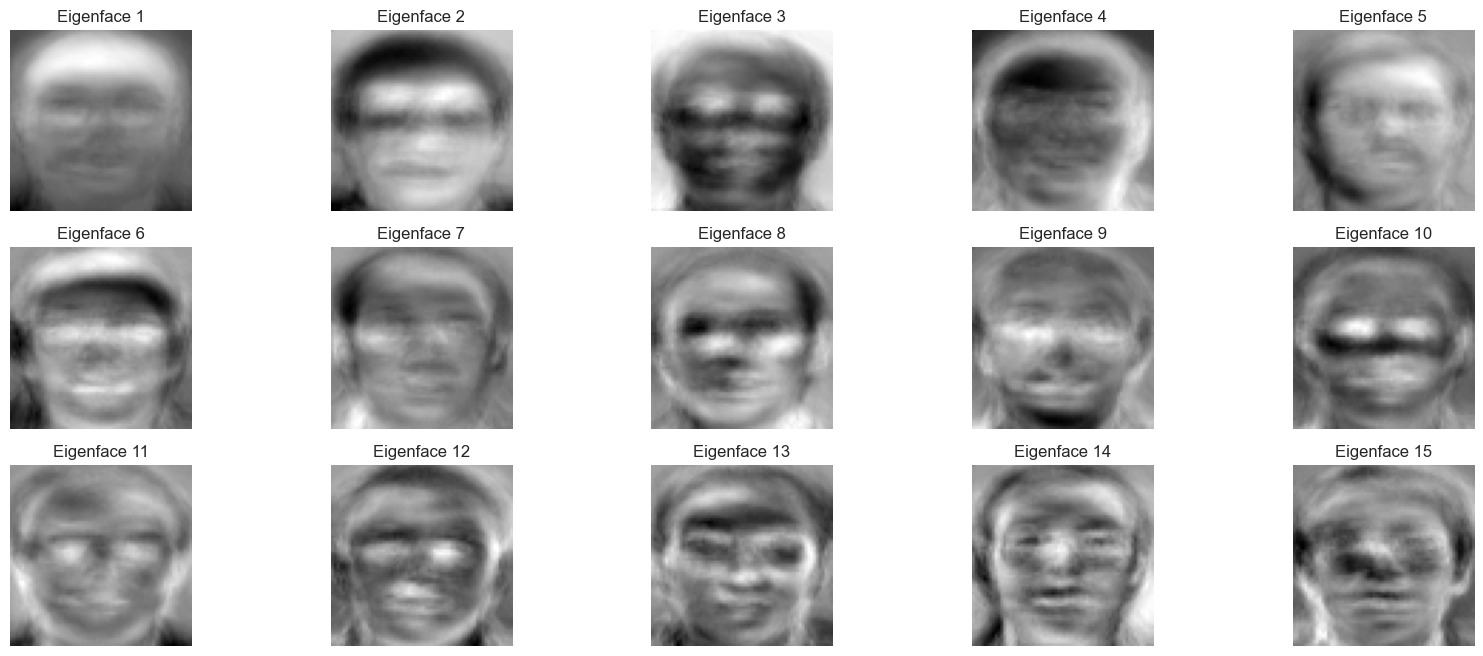

In [73]:
face2 = pcaa.components_.reshape((15, 64, 64))
face_show(face2, "Sklearn")

# Test data Reconstruction

In [81]:
re = train_pca.reconstruct(query_data)

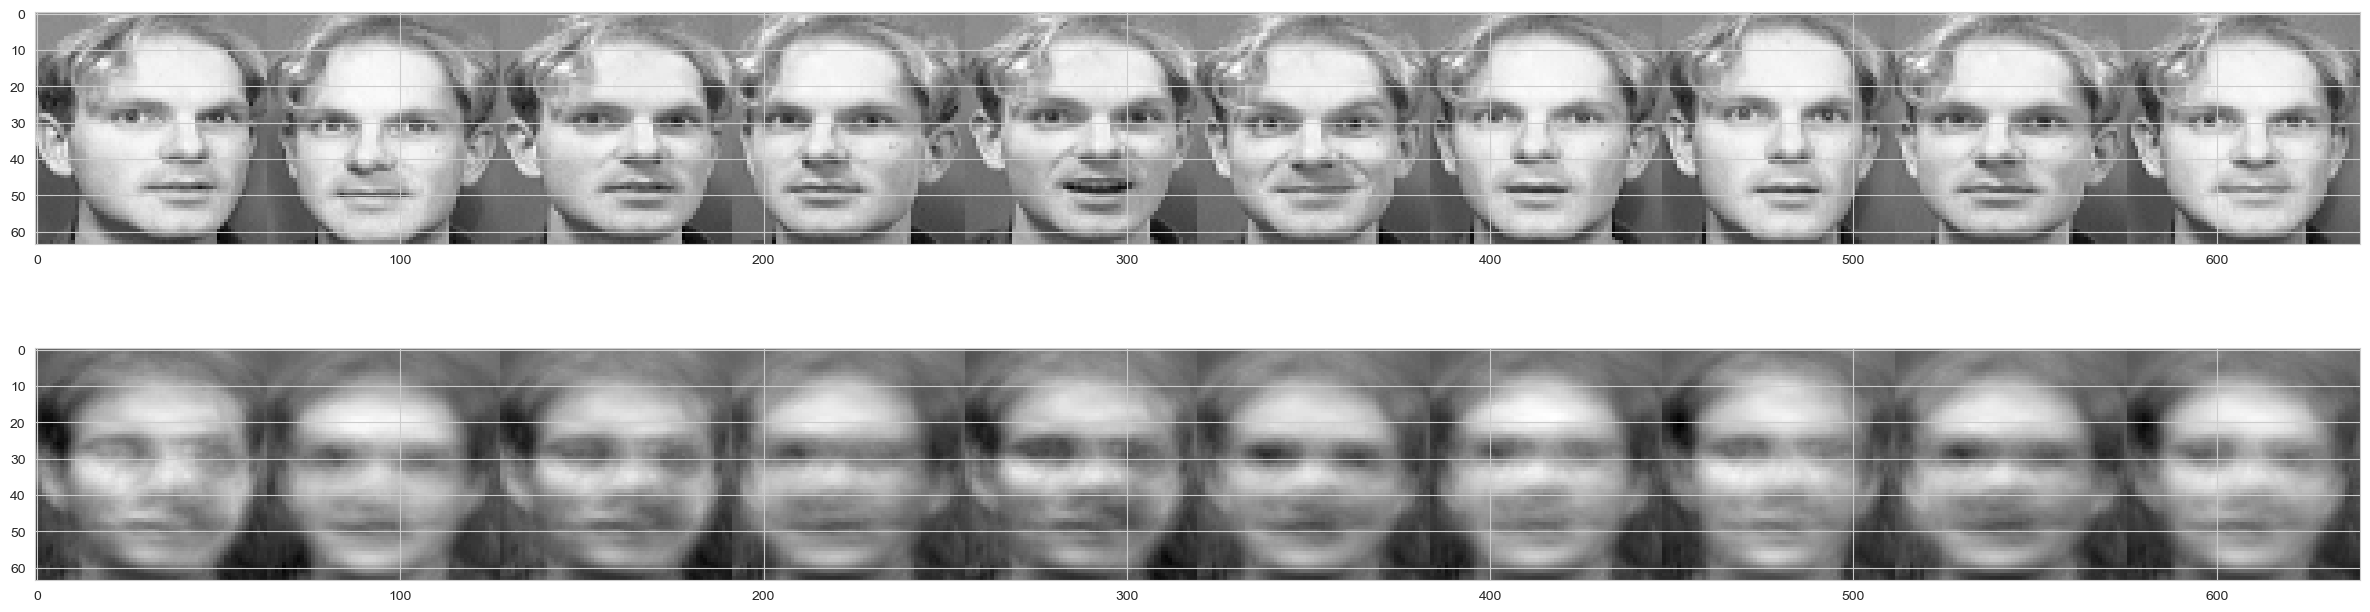

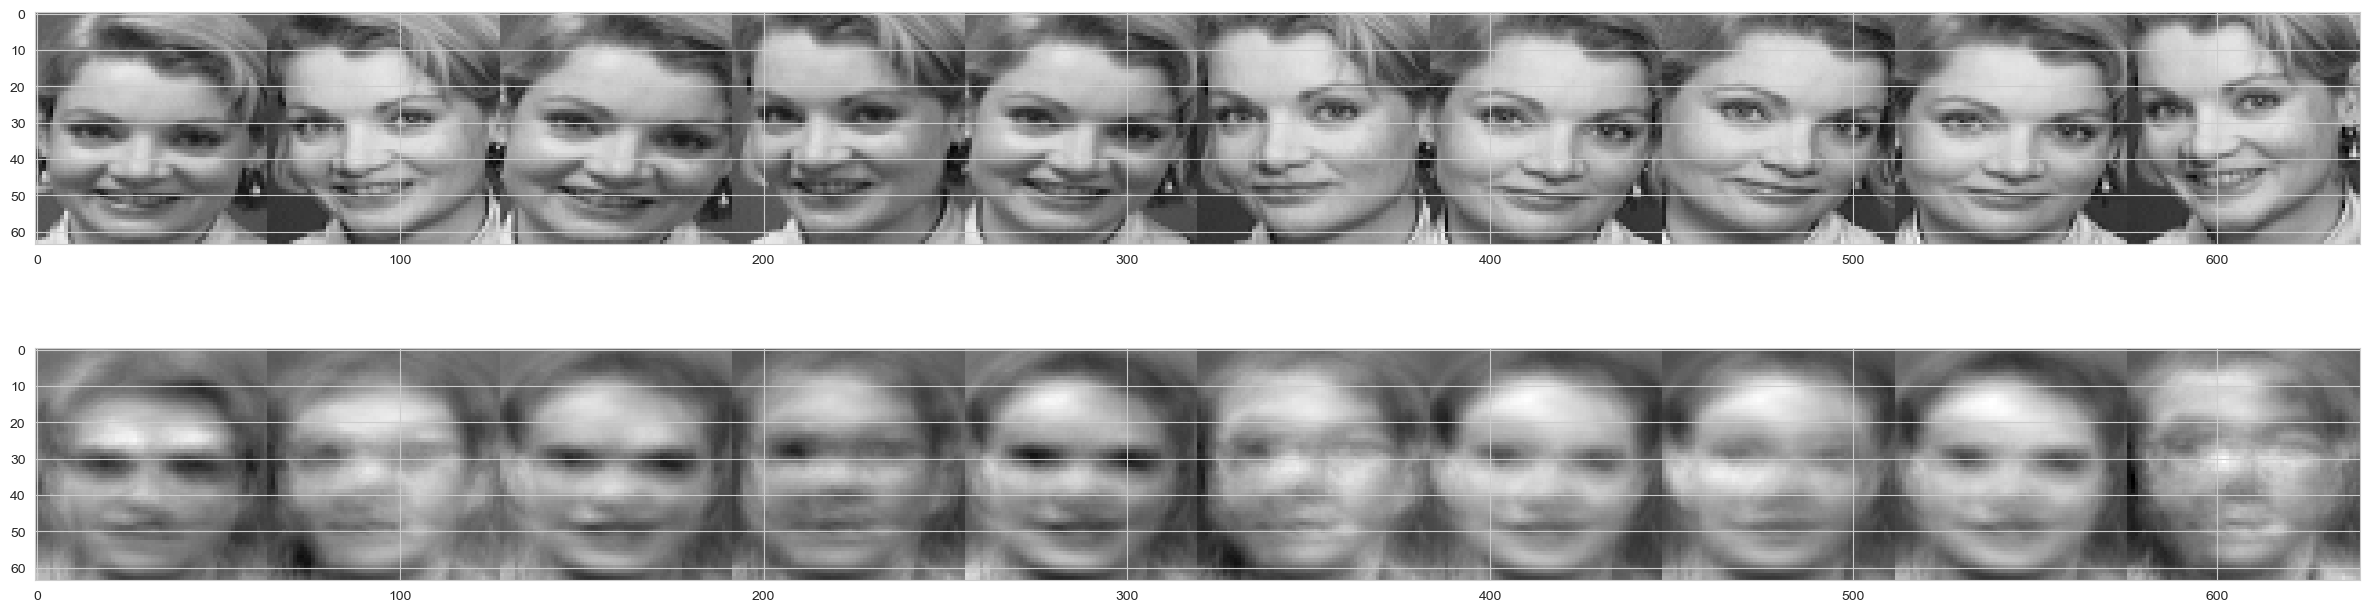

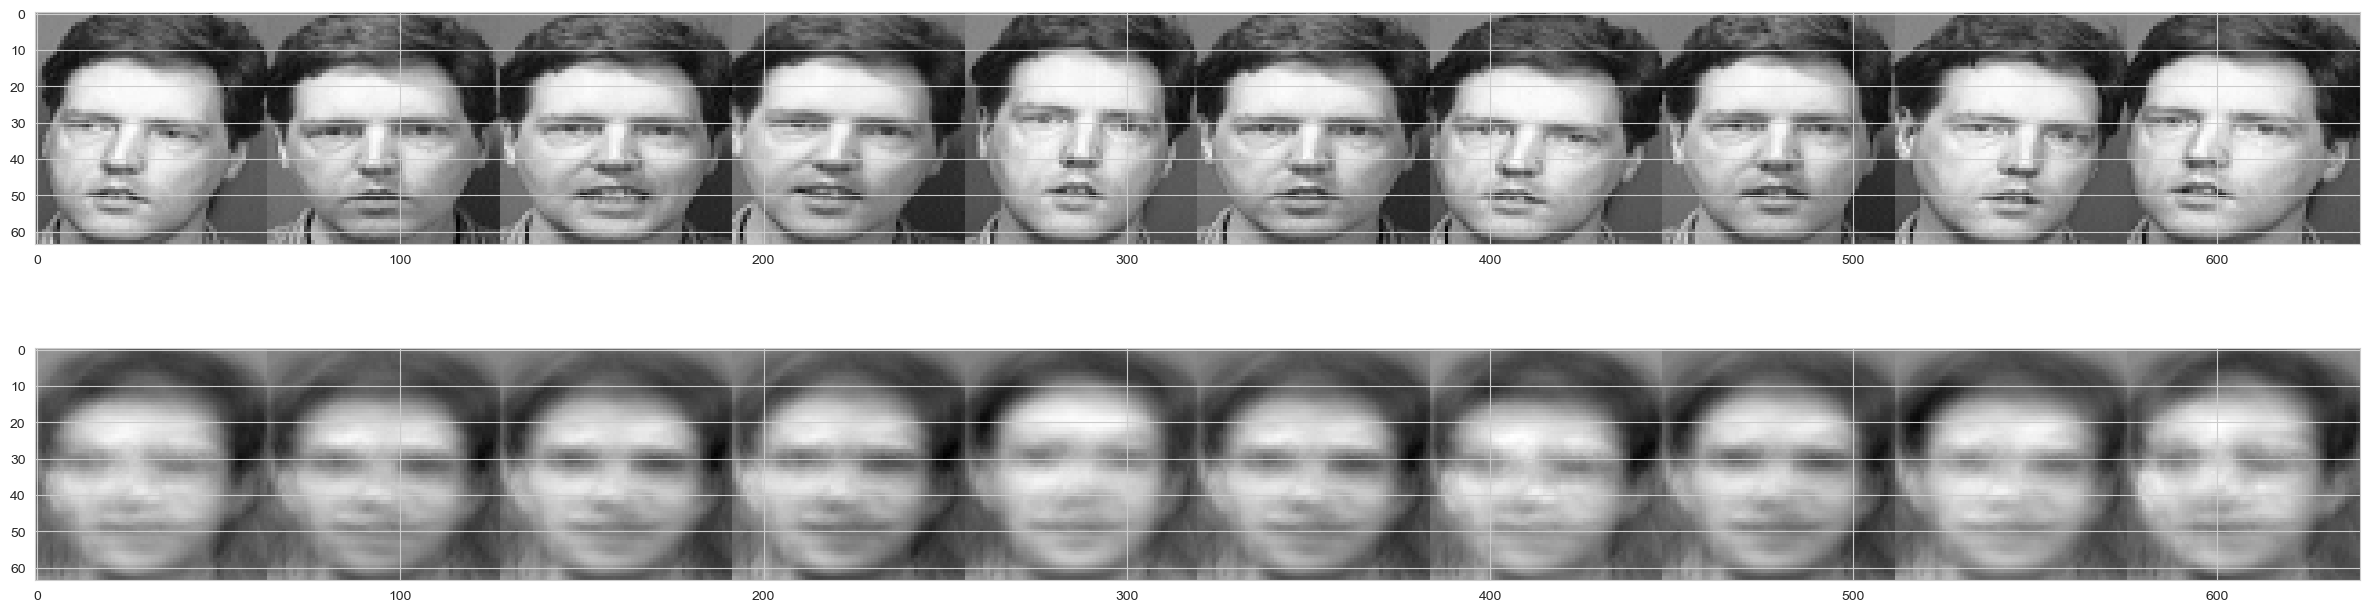

In [84]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 30

origin_image = np.reshape(query_data[:num_images_to_show], (-1, 64, 64))
reconst_image = np.reshape(re[:num_images_to_show], (-1, 64, 64))

# 10개씩 3개로 나누어 출력
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))


for i in range(1):
    ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
    ax[1].imshow(np.concatenate(reconst_image[i*10:(i+1)*10], -1), cmap="gray")

plt.show()

fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))

i=1
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(reconst_image[i*10:(i+1)*10], -1), cmap="gray")

plt.show()

fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))

i=2
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(reconst_image[i*10:(i+1)*10], -1), cmap="gray")

plt.show()



# Test 데이터 구축후 Label 작업 다시하기

In [85]:
test_reuslt = train_pca(query_data)
test_reuslt = test_reuslt[:, :3]

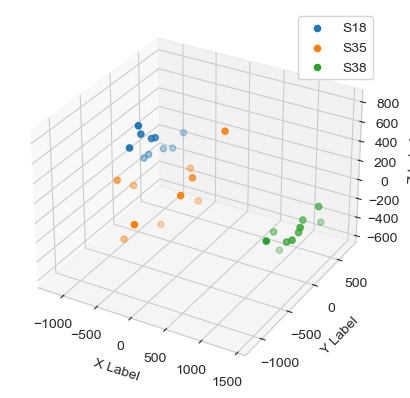

In [86]:
from preprocessing import grid_3d
grid_3d(test_reuslt, query_label, "pca",label_encode_dict)

# knn 훈련시키기

In [87]:
from model import KnnClassifier

In [88]:
np.random.seed(42)

perm = np.random.permutation(len(gallery_data))
x_train_shuffled = gallery_data[perm]
y_train_shuffled = gallery_label[perm]
gallery_image  = x_train_shuffled

# K-Fold 10 실행

In [89]:
from model import knn_cross_validate


pca_list = []
pca_ch = pca_choices = [1,3,5,7,9,11]

for pc in pca_ch:
    train_pca = PCA(gallery_image)
    train_pca.fit(pc)
    x_data_pca = train_pca()
    
    k_to_accuracies = knn_cross_validate(x_data_pca, y_train_shuffled ,num_folds=10)
    pca_list.append(k_to_accuracies)


for i, pca_index in enumerate(pca_choices):
    print("PCA : ", pca_index)
    k_to_accuracies = pca_list[i]
    for k, accs in sorted(k_to_accuracies.items()):
        
        print('k = %d 정확도: %r' % (k, np.array(accs).mean()))

(4096, 4096)
(4096, 4096)
(4096, 4096)
(4096, 4096)
(4096, 4096)
(4096, 4096)
PCA :  1
k = 1 정확도: 15.405405405405407
k = 3 정확도: 15.405405405405403
k = 5 정확도: 18.648648648648646
k = 8 정확도: 15.405405405405403
k = 10 정확도: 14.324324324324326
k = 12 정확도: 13.513513513513516
k = 15 정확도: 14.594594594594597
k = 20 정확도: 16.486486486486484
k = 50 정확도: 8.64864864864865
k = 100 정확도: 2.1621621621621623
PCA :  3
k = 1 정확도: 77.83783783783784
k = 3 정확도: 69.72972972972973
k = 5 정확도: 64.86486486486487
k = 8 정확도: 56.75675675675676
k = 10 정확도: 49.45945945945946
k = 12 정확도: 44.5945945945946
k = 15 정확도: 41.35135135135135
k = 20 정확도: 41.62162162162163
k = 50 정확도: 20.27027027027027
k = 100 정확도: 2.1621621621621623
PCA :  5
k = 1 정확도: 88.91891891891892
k = 3 정확도: 78.37837837837837
k = 5 정확도: 74.86486486486486
k = 8 정확도: 65.4054054054054
k = 10 정확도: 57.837837837837846
k = 12 정확도: 54.32432432432432
k = 15 정확도: 53.24324324324324
k = 20 정확도: 47.027027027027025
k = 50 정확도: 23.783783783783782
k = 100 정확도: 2.1621621621

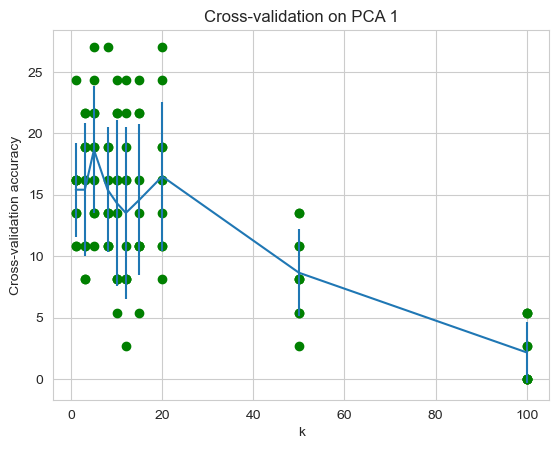

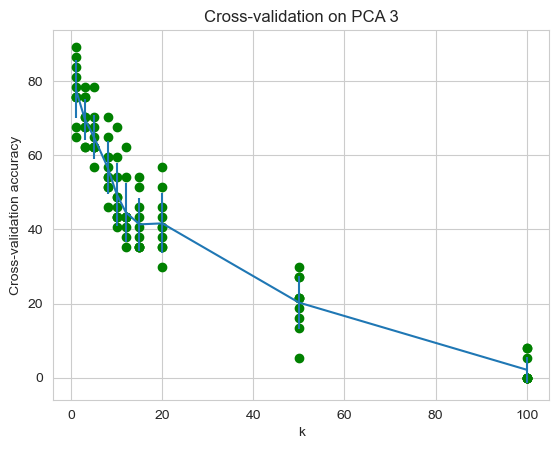

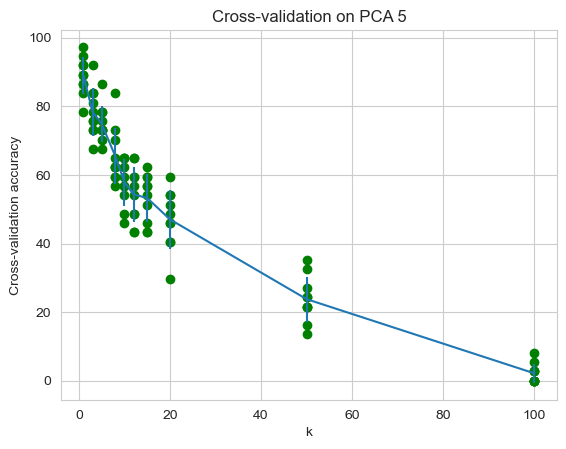

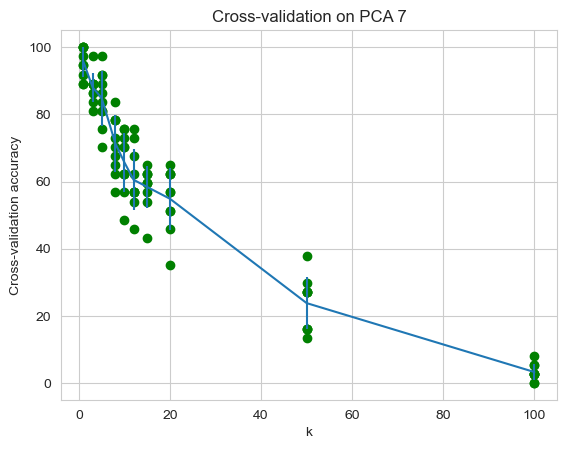

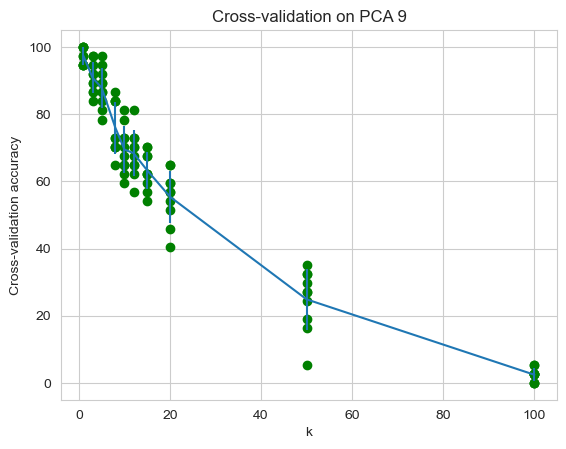

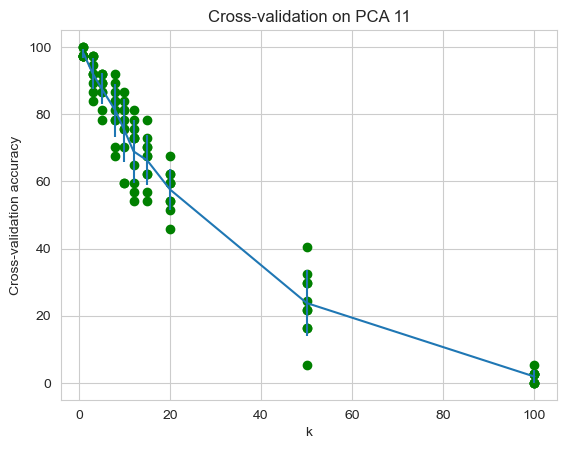

In [90]:
from model import grid_cross_validation

for i, k_to_accuracies in enumerate(pca_list):
    grid_cross_validation(k_to_accuracies,"PCA" , pca_ch[i], i)

# Result

In [91]:
split_index = int(0.8 * len(gallery_image)) 
final_x_train = gallery_image[:split_index] 
final_x_test = gallery_image[split_index:]  

final_y_train = y_train_shuffled[:split_index] 
final_y_test = y_train_shuffled[split_index:]

print("훈련 데이터 shape:", final_x_train.shape)
print("테스트 데이터 shape:", final_x_test.shape)
print("훈련 레이블 shape:", final_y_train.shape)
print("테스트 레이블 shape:", final_y_test.shape)

훈련 데이터 shape: (296, 4096)
테스트 데이터 shape: (74, 4096)
훈련 레이블 shape: (296,)
테스트 레이블 shape: (74,)


In [92]:
from model import knn_get_best_k

best_k, pca_K = knn_get_best_k(pca_list, pca_choices)
pca = PCA(final_x_train)
pca.fit(pca_K)
final_x_data = pca()
classifier = KnnClassifier(final_x_data, final_y_train)

Best K: 1
Best axis :  7
Max Accuracy: 100.0
(4096, 4096)


Got 67 / 74 correct; accuracy is 90.54%
90.54054054054055


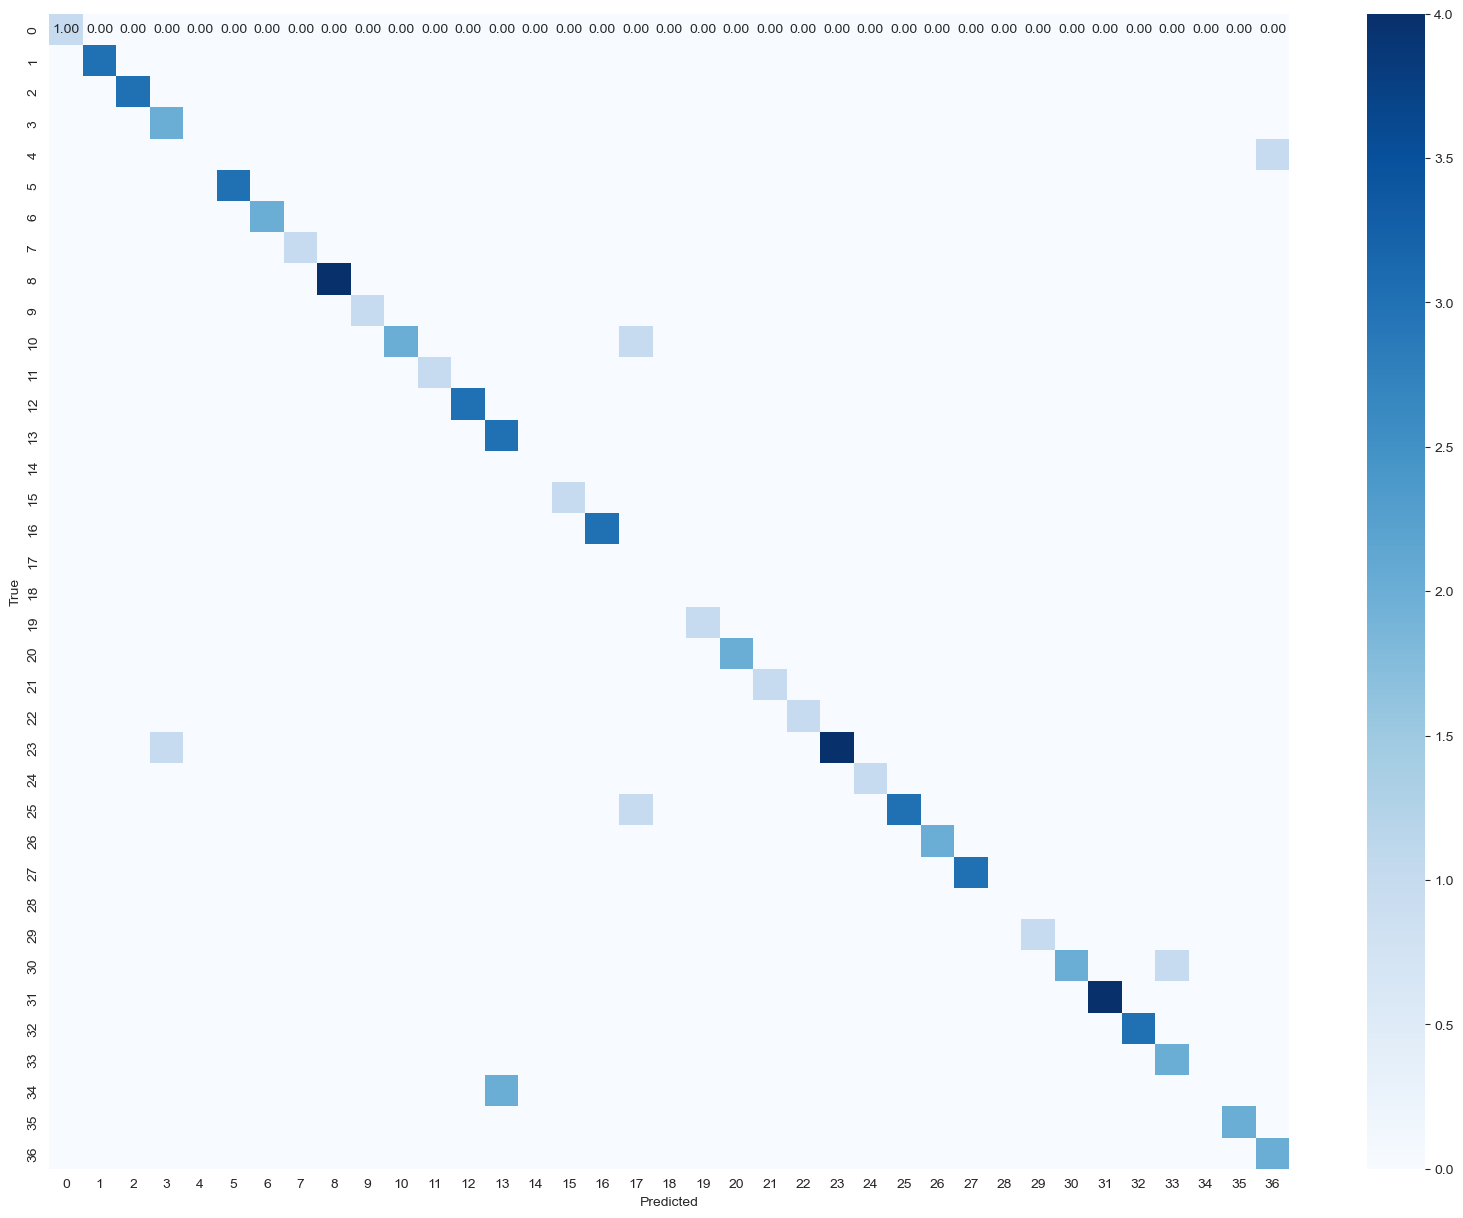

In [104]:
test_data = pca(final_x_test)
pred_test = classifier.predict(test_data, best_k)

print(classifier.check_accuracy(test_data, final_y_test, best_k))
conf = confusion_matrix(pred_test, final_y_test, list(np.unique(final_y_train)))

plt.figure(figsize=(20, 15))  # 그림의 크기 조절
sns.heatmap(conf, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("./fig/pca_confusion_matrix.png")
plt.show()

In [94]:
test_data = pca(query_data)
pred_test = classifier.predict(test_data, best_k)

predict_list = []
for pred in pred_test:
    predict_list.append(gallery_image[y_train_shuffled == pred][0:1, :].reshape(64, 64))

predict_list = np.stack(predict_list)

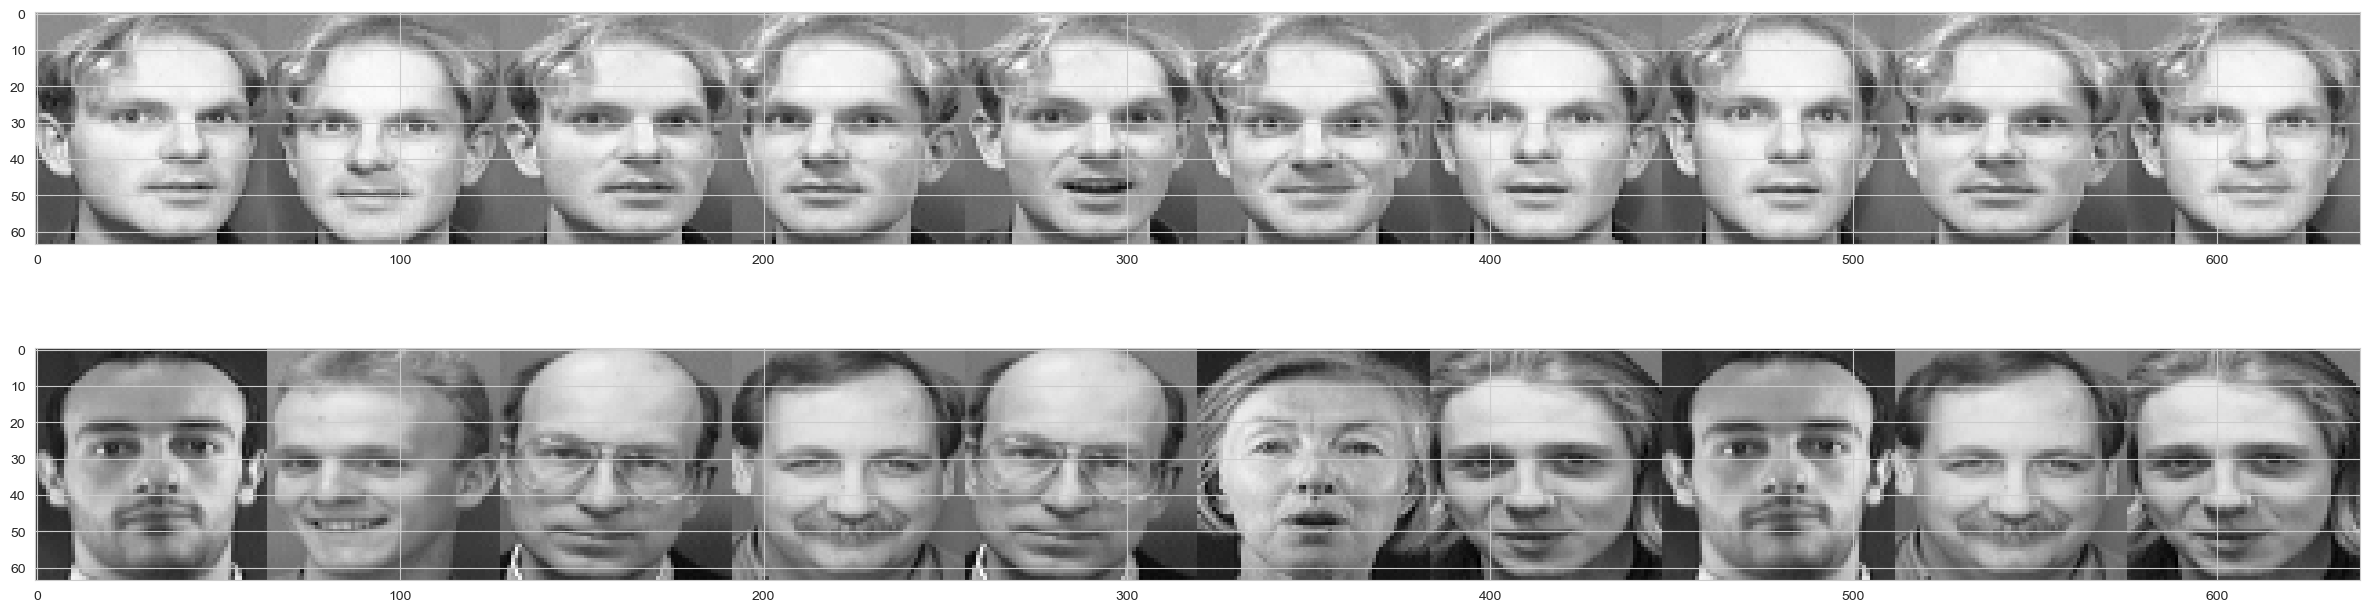

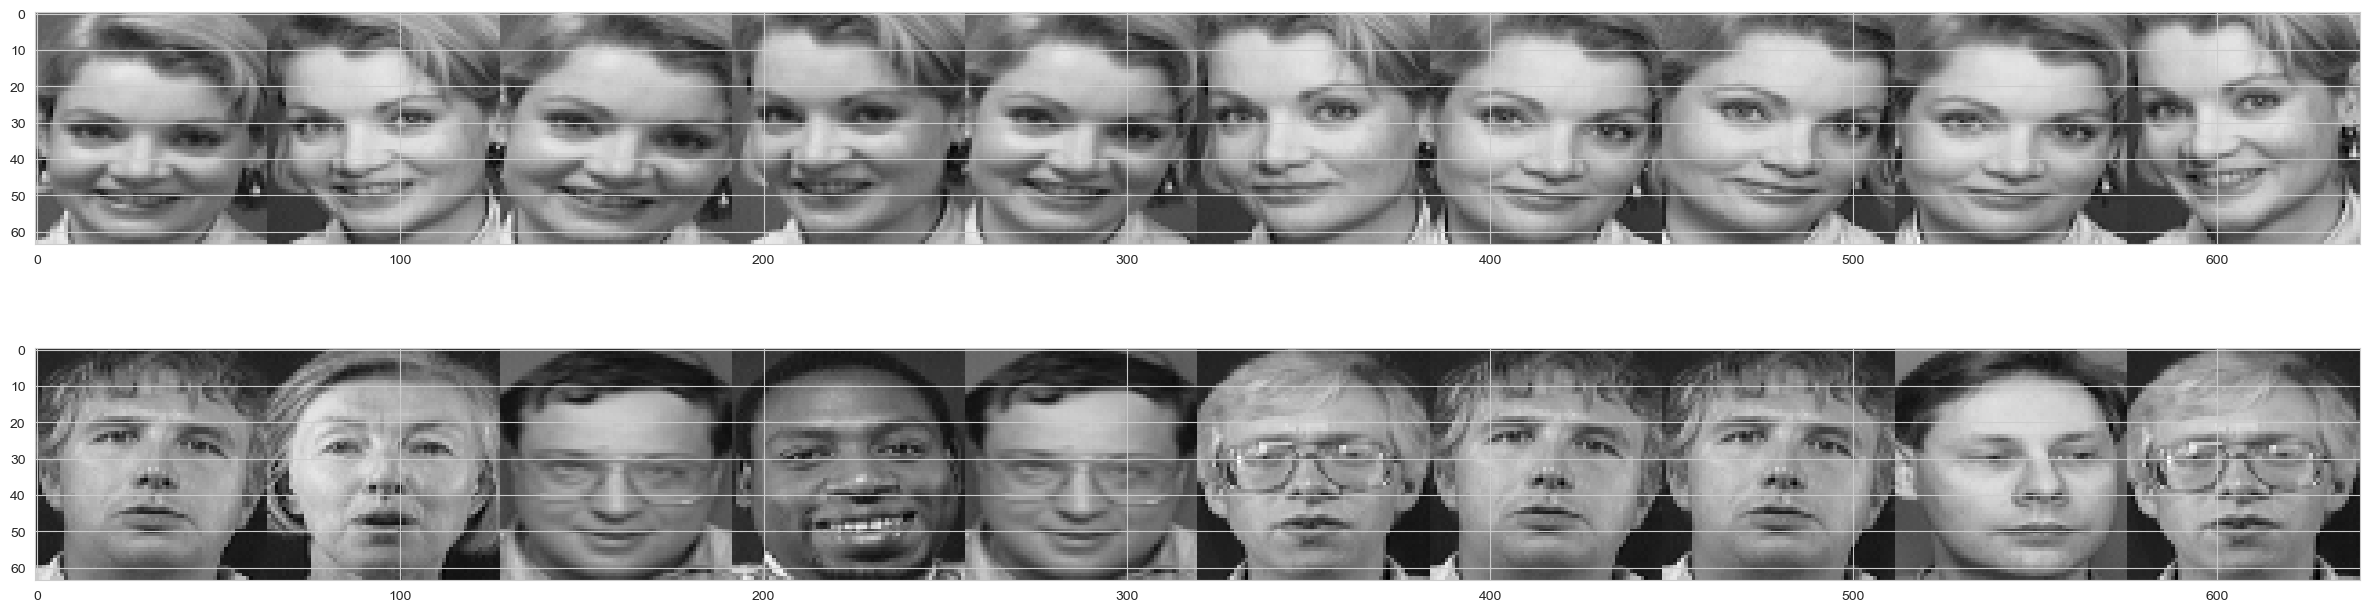

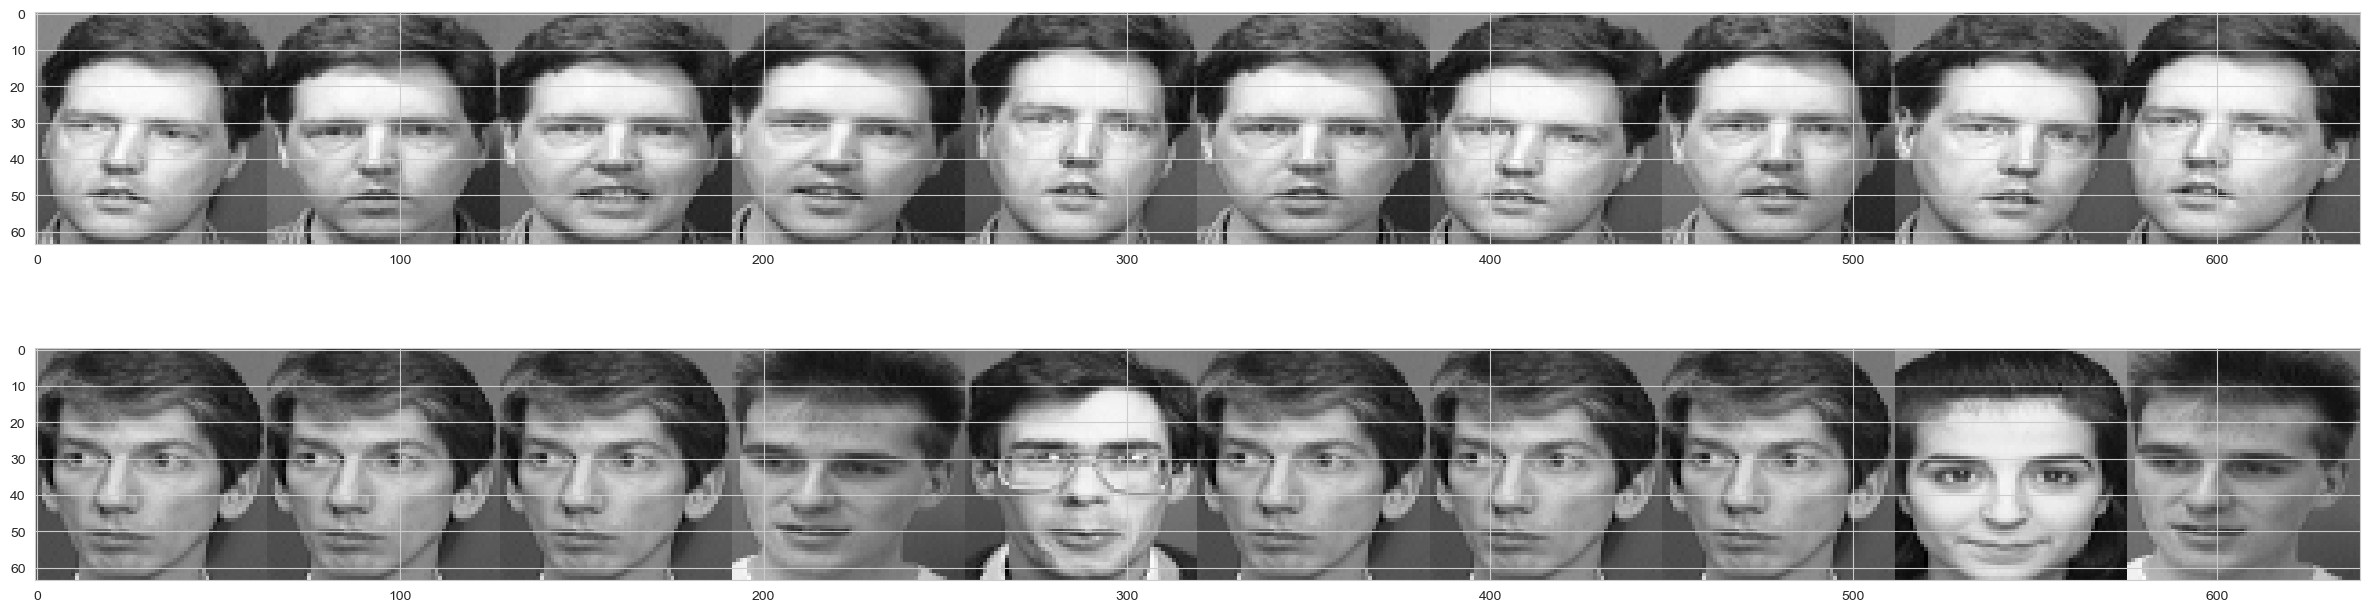

In [106]:
num_images_to_show = 30

origin_image = np.reshape(query_data[:num_images_to_show], (-1, 64, 64))
# reconst_image = np.reshape(re[:num_images_to_show], (-1, 64, 64))

# 10개씩 3개로 나누어 출력
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))


i=0
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(predict_list[i*10:(i+1)*10], -1), cmap="gray")
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))

i=1
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(predict_list[i*10:(i+1)*10], -1), cmap="gray")
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))

i=2
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(predict_list[i*10:(i+1)*10], -1), cmap="gray")
plt.show()


# LDA KNN 실행

In [109]:
print(gallery_image.shape)

(370, 4096)


In [110]:
from model import knn_cross_validate


lda_list = []
axis_choices = [1,3,5,7,9,11]

for axis in axis_choices:
    train_lda = LDA(gallery_image, y_train_shuffled)
    train_lda.fit_svd(axis)
    x_data_lda = train_lda()
    
    k_to_accuracies = knn_cross_validate(x_data_lda, y_train_shuffled ,num_folds=10)
    lda_list.append(k_to_accuracies)



for i, lda_index in enumerate(axis_choices):
    print("LDA :" , lda_index)
    k_to_accuracies = pca_list[i]
    for k, accs in sorted(k_to_accuracies.items()):
         print('k = %d 정확도: %r' % (k, np.array(accs).mean()))

LDA : 1
k = 1 정확도: 15.405405405405407
k = 3 정확도: 15.405405405405403
k = 5 정확도: 18.648648648648646
k = 8 정확도: 15.405405405405403
k = 10 정확도: 14.324324324324326
k = 12 정확도: 13.513513513513516
k = 15 정확도: 14.594594594594597
k = 20 정확도: 16.486486486486484
k = 50 정확도: 8.64864864864865
k = 100 정확도: 2.1621621621621623
LDA : 3
k = 1 정확도: 77.83783783783784
k = 3 정확도: 69.72972972972973
k = 5 정확도: 64.86486486486487
k = 8 정확도: 56.75675675675676
k = 10 정확도: 49.45945945945946
k = 12 정확도: 44.5945945945946
k = 15 정확도: 41.35135135135135
k = 20 정확도: 41.62162162162163
k = 50 정확도: 20.27027027027027
k = 100 정확도: 2.1621621621621623
LDA : 5
k = 1 정확도: 88.91891891891892
k = 3 정확도: 78.37837837837837
k = 5 정확도: 74.86486486486486
k = 8 정확도: 65.4054054054054
k = 10 정확도: 57.837837837837846
k = 12 정확도: 54.32432432432432
k = 15 정확도: 53.24324324324324
k = 20 정확도: 47.027027027027025
k = 50 정확도: 23.783783783783782
k = 100 정확도: 2.1621621621621623
LDA : 7
k = 1 정확도: 95.67567567567566
k = 3 정확도: 88.1081081081081
k = 5 정확도

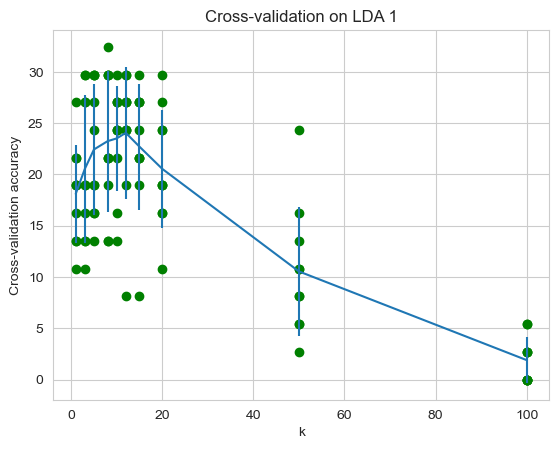

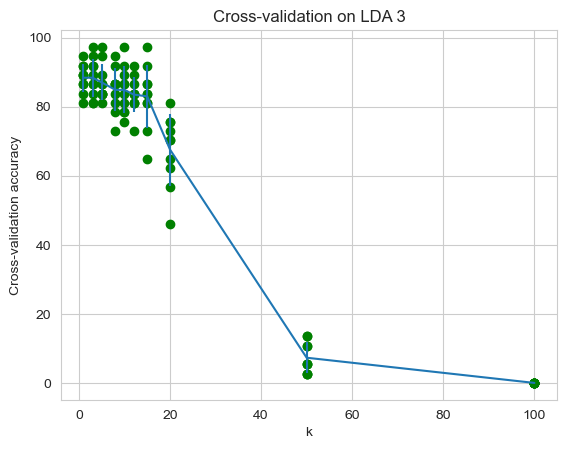

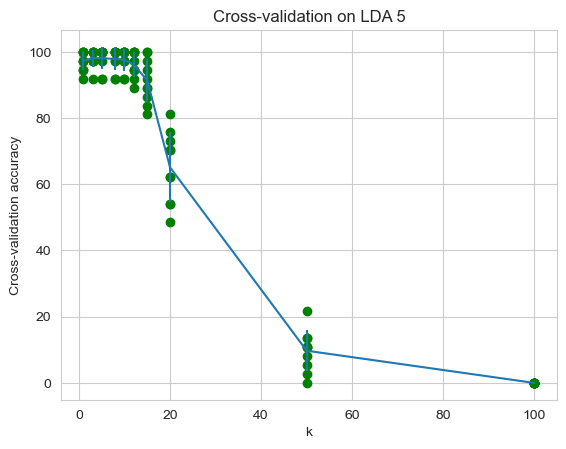

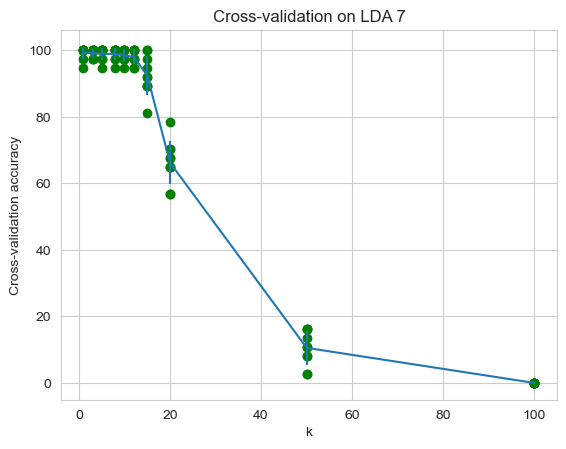

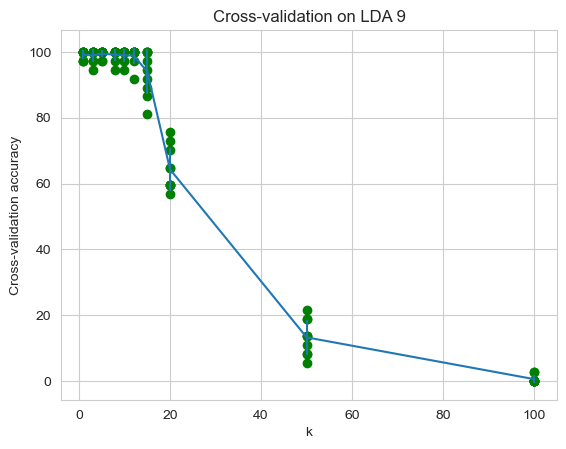

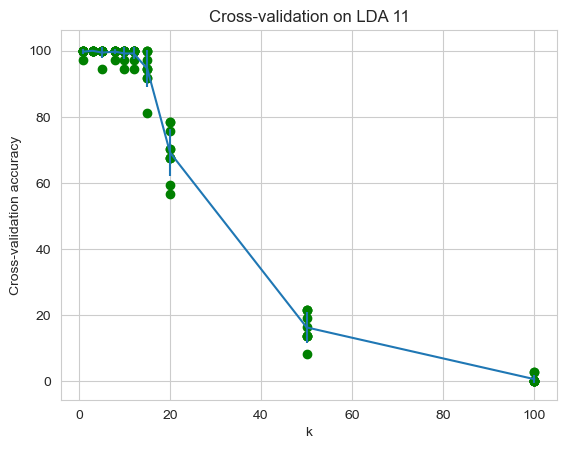

In [111]:
from model import grid_cross_validation
for i, k_to_accuracies in enumerate(lda_list):
    grid_cross_validation(k_to_accuracies, "LDA",axis_choices[i], i)

# Result

In [123]:
split_index = int(0.8 * len(gallery_image)) 
final_x_train = gallery_image[:split_index] 
final_x_test = gallery_image[split_index:]  

final_y_train = y_train_shuffled[:split_index] 
final_y_test = y_train_shuffled[split_index:]

print("훈련 데이터 shape:", final_x_train.shape)
print("테스트 데이터 shape:", final_x_test.shape)
print("훈련 레이블 shape:", final_y_train.shape)
print("테스트 레이블 shape:", final_y_test.shape)

훈련 데이터 shape: (296, 4096)
테스트 데이터 shape: (74, 4096)
훈련 레이블 shape: (296,)
테스트 레이블 shape: (74,)


In [124]:
from model import knn_get_best_k

best_k, axis_K = knn_get_best_k(lda_list, axis_choices)
custom_lda = LDA(final_x_train, final_y_train)
custom_lda.fit_svd(axis_K)
final_x_data = custom_lda()
classifier = KnnClassifier(final_x_data, final_y_train)

Best K: 1
Best axis :  5
Max Accuracy: 100.0


In [125]:
test_data = custom_lda(final_x_test)
pred_test = classifier.predict(test_data, best_k)

print(classifier.check_accuracy(test_data, final_y_test, 1))
conf = confusion_matrix(pred_test, final_y_test, list(np.unique(final_y_train)))
# 
plt.figure(figsize=(20, 15))  # 그림의 크기 조절
sns.heatmap(conf, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("./fig/pca_confusion_matrix.png")
plt.show()

Got 68 / 74 correct; accuracy is 91.89%
91.89189189189189


TypeError: too many positional arguments

In [116]:
test_data = custom_lda(query_data)
pred_test = classifier.predict(test_data, best_k)

predict_list = []
for pred in pred_test:
    predict_list.append(gallery_image[y_train_shuffled == pred][0:1, :].reshape(64, 64))

predict_list = np.stack(predict_list)

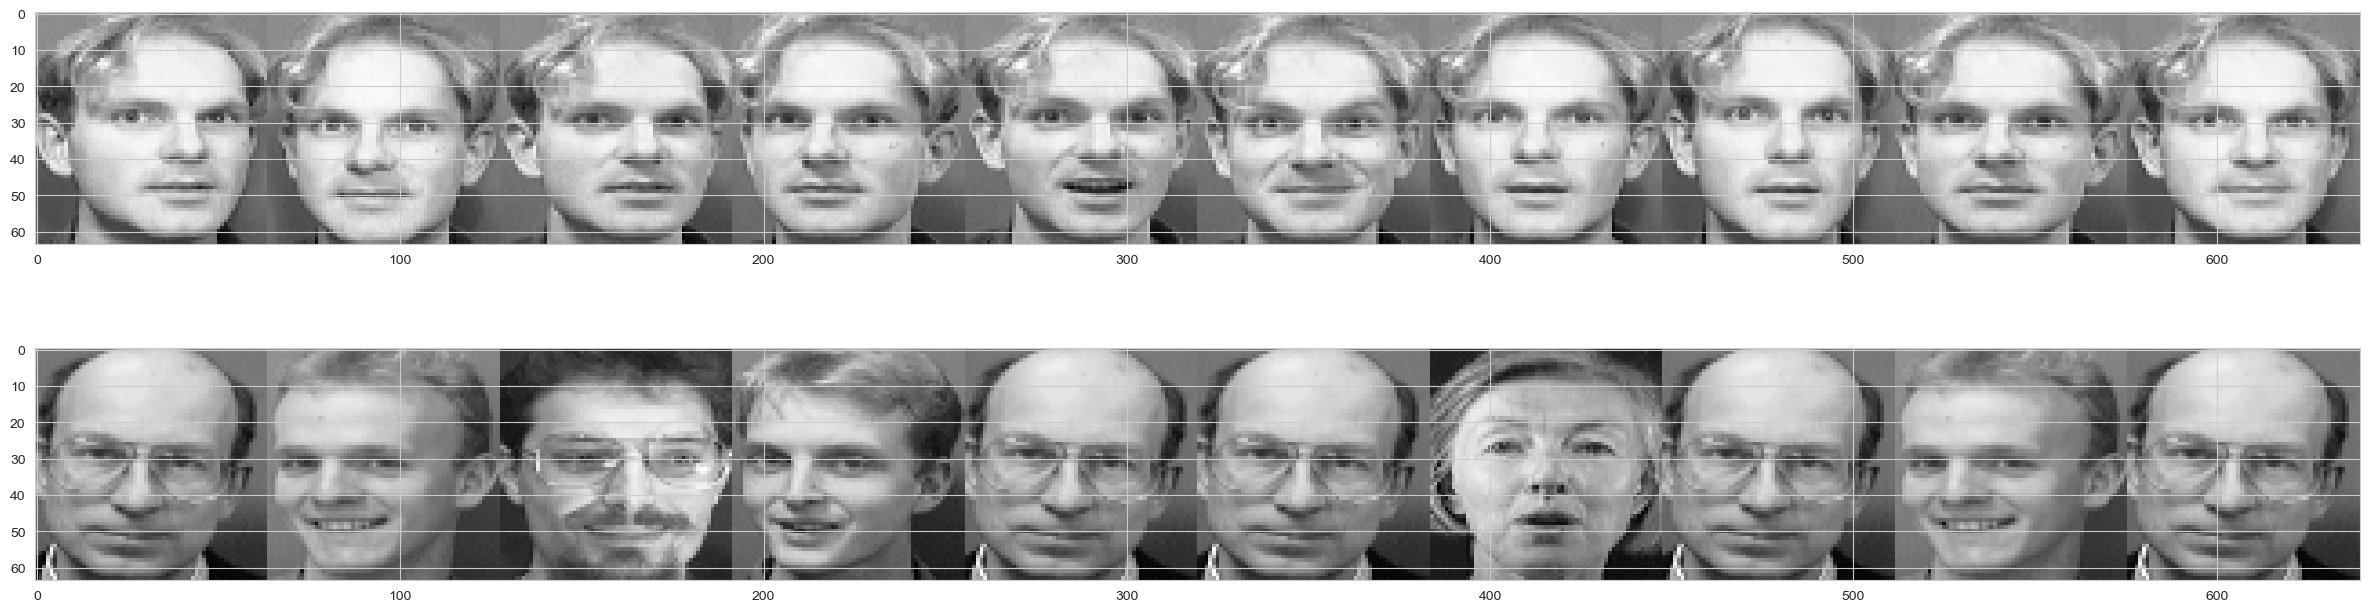

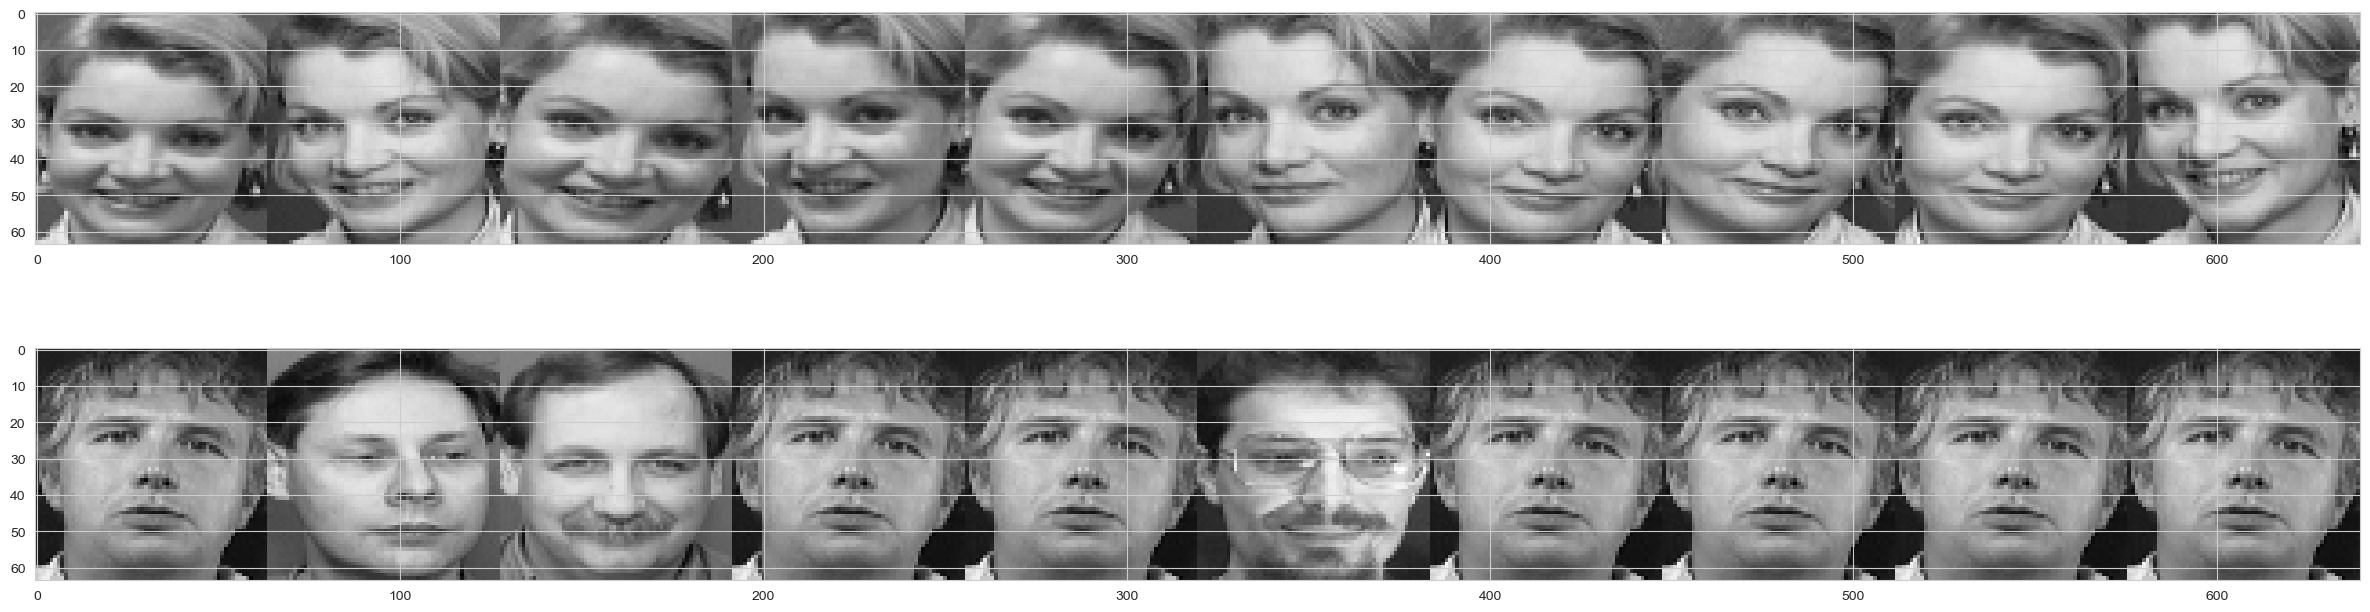

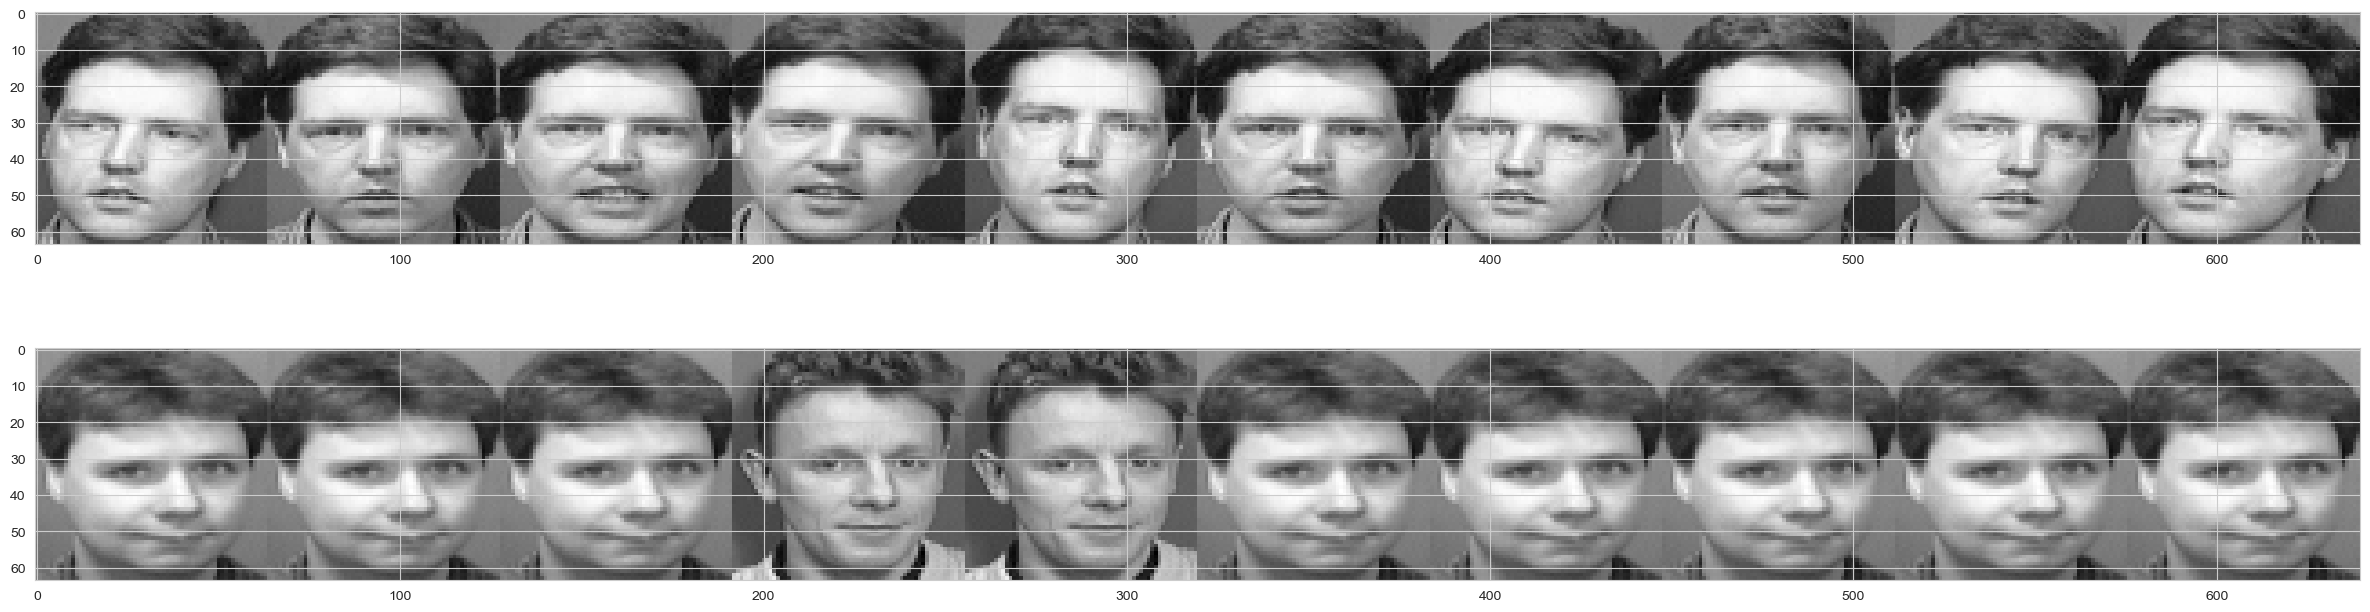

In [117]:
num_images_to_show = 30

origin_image = np.reshape(query_data[:num_images_to_show], (-1, 64, 64))
# reconst_image = np.reshape(re[:num_images_to_show], (-1, 64, 64))

# 10개씩 3개로 나누어 출력
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))


i=0
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(predict_list[i*10:(i+1)*10], -1), cmap="gray")
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))

i=1
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(predict_list[i*10:(i+1)*10], -1), cmap="gray")
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 1, 8))

i=2
ax[0].imshow(np.concatenate(origin_image[i*10:(i+1)*10], -1), cmap="gray")
ax[1].imshow(np.concatenate(predict_list[i*10:(i+1)*10], -1), cmap="gray")
plt.show()